In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy as sp
# data path, constants, etc.
import sys
datapath = '/Users/nhamilto/Documents/ATom/coderepo/calibration_data/'
sys.path.append(datapath)
datapath = '/Users/nhamilto/Documents/ATom/coderepo/'
sys.path.append(datapath)


# constants and parameters from data collection
import constants 

# signal latency from AT array
import offsets 

# plot things
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

import atom_functions_v1 as atom

In [2]:
test = atom.dataset('/Users/nhamilto/Documents/ATom/data/new_data/')
test.load_data_sample(0)
atomsigs, tt, tr = test.extract_travel_times(upsamplefactor=1)

In [ ]:
%%timeit
atomsigs, tt, tr = test.extract_travel_times(upsamplefactor=1)

4.08 s ± 228 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%timeit
atomsigs, tt, tr = test.extract_travel_times(upsamplefactor=5)

3min 35s ± 3.69 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
atomsigs, tt, tr = test.extract_travel_times(upsamplefactor=10)

In [ ]:
print('yes')

(0.41, 0.43)

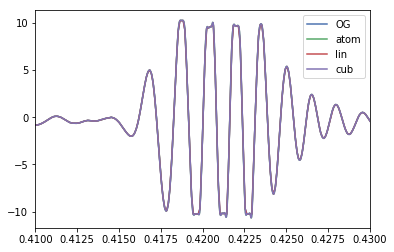

In [77]:
fig,ax = plt.subplots()

ax.plot(np.linspace(0, 1, len(micsamp)), micsamp['M2'].values)
ax.plot(np.linspace(0, 1, len(mic2)), mic2['M2'].values)
ax.plot(xnew/xnew.max(), miclin[:,2])
ax.plot(xnew/xnew.max(), miccub[:,2])
ax.legend(['OG','atom','lin','cub'])
ax.set_xlim(0.41, 0.43)

In [79]:
datasample = micsamp.copy()
upsamplefactor = 5
delta_t = datasample.index[1] - datasample.index[0]
rule = delta_t / upsamplefactor

In [86]:
xold = np.arange(len(micsamp))
xnew = np.arange(0, len(micsamp), 1/upsamplefactor)
xnew = xnew[:-(upsamplefactor-1)]

interpolant = sp.interpolate.interp1d(np.arange(len(micsamp)), micsamp.values, axis=0)
newdatasample = int1(xnew)

newdatasample = pd.DataFrame(newdatasample,
    columns=micsamp.columns,
    index=pd.DatetimeIndex(start=0, freq = '{}U'.format(rule.microseconds), periods=len(xnew)))

In [24]:
miclin

array([[-0.015, -0.028, -0.02 ,  0.051, -0.017, -0.104, -0.027, -0.004]])

In [25]:
5*len(micsamp)

50000